### exe 1.a

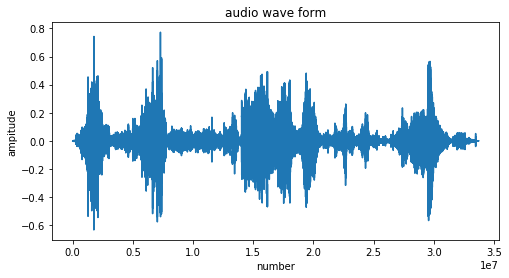

In [20]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

# read data
dict_data = scipy.io.loadmat("amp_data.mat")
amp_data = dict_data["amp_data"]

# plot the entire audio
plt.figure(figsize=(8,4))
x_axis = np.arange(amp_data.size)
plt.plot(x_axis, amp_data)
plt.title("audio wave form")
plt.xlabel("number")
plt.ylabel("ampitude")
plt.show()

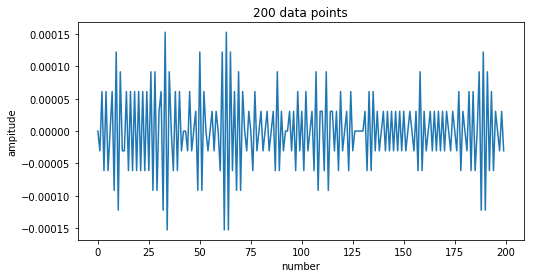

In [54]:
# plot the first 200 data points
plt.figure(figsize=(8,4))
points = 200
x_axis = np.arange(points)
plt.plot(x_axis, amp_data[:points])
plt.title("200 data points")
plt.xlabel("number")
plt.ylabel("ampitude")
plt.show()

In [ ]:
# play the audio
#sample_rate = 44100
#scipy.io.wavfile.write("amp_data.wav", sample_rate, amp_data)
#ipd.Audio('amp_data.wav')

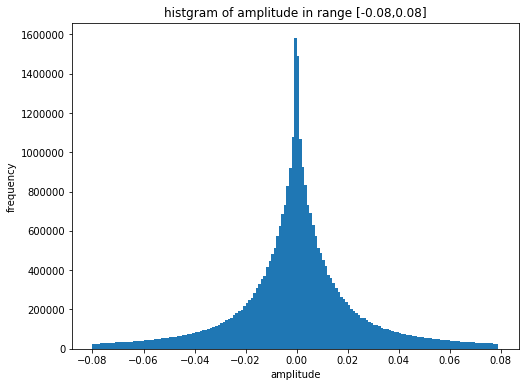

In [60]:
#max_am, min_am = 0.00020, -0.00015
plt.figure(figsize=(8,6))
plt.hist(amp_data,np.arange(-0.08,0.08,0.001))
#plt.hist(amp_data,[-0.00015+i*0.00001 for i in range(35)])
plt.title("histgram of amplitude in range [-0.08,0.08]")
plt.xlabel("amplitude")
plt.ylabel("frequency")
plt.show()

anwser: In a long run on time, there is some vibration so it's hard to say we can fit it using some model with a simple shape. And the amplitude is not distributed on the real number field, but just concentrated on some points. And there are more points near 0 amplitude. There are more points with amplitude smaller than 0 than larger than 0, which could be observed as a bell curve.

### exe 1.b

In [64]:
import math
#print(amp_data.size) 33713280 1605394 33713274

trimmed_data = amp_data[:amp_data.size-amp_data.size%21]
amp_data_set = np.reshape(trimmed_data, (trimmed_data.size//21,21))
#print(amp_data_set.shape) #(1605394, 21)
np.random.seed(20)
perm_amp_data = np.random.permutation(amp_data_set)
total_size = perm_amp_data.shape[0]
train_, validation_, total_size= math.floor(0.7*total_size), math.floor(0.85*total_size), total_size
X_shuf_train = perm_amp_data[:train_,:20]
y_shuf_train = perm_amp_data[:train_,20]
X_shuf_val = perm_amp_data[train_:validation_,:20]
y_shuf_val = perm_amp_data[train_:validation_,20]
X_shuf_test = perm_amp_data[validation_:total_size,:20]
y_shuf_test = perm_amp_data[validation_:total_size,20]

1605394



### exe 2

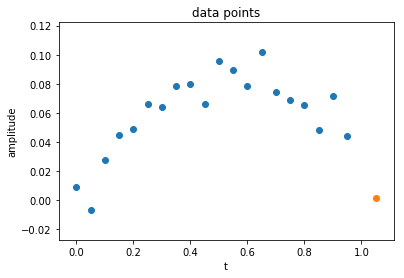

In [83]:
t_train = np.array([i/20 for i in range(20)])
data_number = 1127
x_train_1 = X_shuf_train[data_number]
t_test_exe2 = np.array([21/20])
x_test_exe2 = y_shuf_train[data_number]
plt.figure()
plt.scatter(t_train, x_train_1)
plt.scatter(t_test_exe2, x_test_exe2)
plt.title("data points")
plt.xlabel("t")
plt.ylabel("amplitude")
plt.show()

20


/Users/megadix/bin/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
/Users/megadix/bin/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


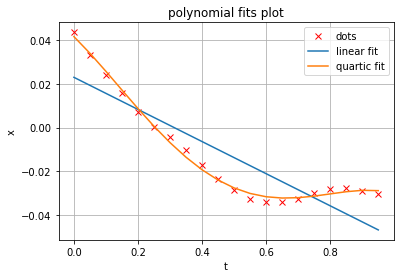

In [91]:
t_train = np.array([i/20 for i in range(20)])
x_train_1 = X_shuf_train[0]

fig, ax = plt.subplots()
p1,=ax.plot(t_train, x_train_1, "rx")


t_train_2 = np.concatenate([[t_train**i] for i in range(2)], axis=0)#need [] to concatenate by columns
w_1 = np.linalg.lstsq(t_train_2.transpose(), x_train_1[:,np.newaxis])[0]# 5*20 1*20 both needed to be transposed
p2,=ax.plot(t_train, np.dot(t_train_2.transpose(),w_1)) # 20*5 5*1

t_train_3 = np.concatenate([[t_train**i] for i in range(5)], axis=0)#need [] to concatenate by columns
w_1 = np.linalg.lstsq(t_train_3.transpose(), x_train_1[:,np.newaxis])[0]# 5*20 1*20 both needed to be transposed
p4,=ax.plot(t_train, np.dot(t_train_3.transpose(),w_1), label="6th polynomial fit") # 20*5 5*1
ax.set(xlabel='t', ylabel='x',
       title='polynomial fits plot')
ax.grid()
ax.legend((p1,p2,p3),("dots", "linear fit","quartic fit"))
plt.show()

/afs/inf.ed.ac.uk/user/s18/s1818506/.conda/envs/mlpr/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


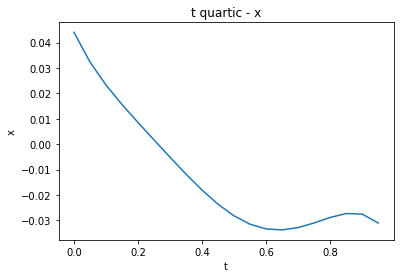

Anwser: 
exe2.b because in the short time the shape of points are similar to straight line. The relationship among them is more linear. In the long time context the change of shape is more complex so the quartic model is complex enough to represent them, whilc the straight line is not powerful enough.
exe2.c 4-5 might be the best. When I increase the order, I found the performance of predicting the next point will be worse, because of the overfitting. When the order of polynomial is up to 6, the tail starts to low down while the true point is upside the curve.

### exe3


exe 3.a   $$v = \Phi (\Phi^\mathrm{T} \Phi)^{-1} \Phi^\mathrm{T}  $$
exe 3.b

In [85]:
def phi(c, k, x):
    
    '''
    return: matrix: column is different ts, row is different columns
    '''
    
    x_array_c = x[:c] 
    #print(x_array_c.shape)
    return_list = []
    for i in x_array_c:
        return_list.append([i**j for j in range(k)])
    return np.array(return_list)

def make_vv(phi):
    #print(phi)
    instant_1 = np.linalg.inv(np.dot(phi.T,phi))
    #print(instant_1)
    instant_2 = np.dot(phi, instant_1)
    return np.dot(instant_2, phi.T)



def cost_function(x, y, vv):
    
    y_fit = np.dot(x,vv)
    #print(y,y_fit)
    return np.sum(np.square(y-y_fit))

because $f(t=1) = w^\mathrm{T}\Phi =v^\mathrm{T}x$, so we can use makevv function to predict the $f(t=1)$ 

exe3.c

In [87]:
rmse_min,c_opt,k_opt = 600,0,0
for c in range(1,10):
    for k in range(1,c):

        Phi_ = phi(c,k,X_shuf_train[:,-1]) 
        vv = make_vv(Phi_)

        rmse = cost_function(X_shuf_train[:c,-1],y_shuf_train[:c],vv)
        if rmse<rmse_min:
            rmse_min = rmse
            c_opt,k_opt = c,k
        
print('mse: %f'%rmse)
print('c: %d, k: %d'%(c,k))

mse: 0.000776
c: 9, k: 8


In [9]:
c,k = 9,8
Phi_ = phi(c,k,X_shuf_train[:,-1]) 
vv = make_vv(Phi_)

rmse_train = cost_function(X_shuf_train[:c,-1],y_shuf_train[:c],vv)
rmse_validation = cost_function(X_shuf_val[:c,-1],y_shuf_val[:c],vv)
rmse_test = cost_function(X_shuf_test[:c,-1],y_shuf_test[:c],vv)
print('train mse: %f'%rmse_train )
print('validation mse: %f'%rmse_validation )
print('test mse: %f'%rmse_test )

train mse: 0.000776
validation mse: 0.000104
test mse: 0.001143


## exe.4
### exe.4.a

In [10]:
def phi_4(c, x):
    
    '''
    return: matrix: column is different ts, row is different columns
    '''
    
    x_array_c = x[:,-c:] 
    #print(x_array_c.shape)
    
    return x_array_c

def make_vv(phi):
    #print(phi)
    instant_1 = np.linalg.inv(np.dot(phi.T,phi))
    #print(instant_1)
    instant_2 = np.dot(phi, instant_1)
    return np.dot(instant_2, phi.T)

In [11]:
min_cost, c_opt = 60000, 0
for c in range(1,21):
    X_train_4 = X_shuf_train[:,-c:]
    y_train_4 = y_shuf_train[:]
    X_val_4 = X_shuf_val[:,-c:]
    y_val_4 = y_shuf_val
    X_test_4 = X_shuf_test[:,-c:]
    y_test_4 = y_shuf_test[:]
    v = np.linalg.lstsq(X_train_4,y_train_4)[0]
    #print(v)
    #print('cost:',cost_function(X_train_4 , y_train_4, v))
    temp_cost = cost_function(X_val_4 , y_val_4, v)/X_val_4.shape[0]
    if temp_cost<min_cost:
        min_cost = temp_cost
        c_opt = c
print('c:',c_opt)
print('least square validation cost:', min_cost)
print('least square test cost:', cost_function(X_test_4 , y_test_4, v)/X_test_4.shape[0])

/afs/inf.ed.ac.uk/user/s18/s1818506/.conda/envs/mlpr/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


c: 20
least square validation cost: 7.575891570922088e-06
least square test cost: 8.302213586654322e-06


The context 20 gives the minimun square cost, because it is gives the most information, and the distribution on that typical.

### exe.4.b


In [12]:
print('Q3 test mse: %f'%rmse_test )
print('Q4 least square test cost:', cost_function(X_test_4 , y_test_4, v)/X_test_4.shape[0])

Q3 test mse: 0.001143
Q4 least square test cost: 8.302213586654322e-06


The approach of Q4 is better
### exe.4.c

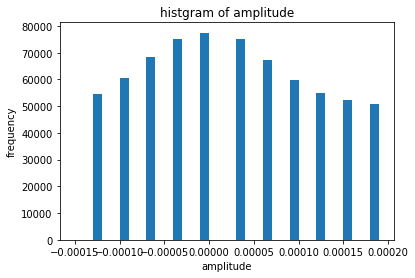

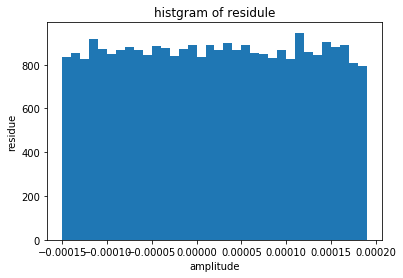

In [13]:
plt.figure(figsize=(6,4))
plt.hist(amp_data,[-0.00015+i*0.00001 for i in range(35)])
plt.title("histgram of amplitude")
plt.xlabel("amplitude")
plt.ylabel("frequency")
plt.show()


residule_q4 = y_val_4 - np.dot(X_val_4,v)
#print(residule_q4)
plt.figure(figsize=(6,4))
plt.hist(residule_q4,[-0.00015+i*0.00001 for i in range(35)])
plt.title("histgram of residule")
plt.xlabel("amplitude")
plt.ylabel("residue")
plt.show()

It shows that the residues on different data are similar, even there are some ampitudes not in the training data set. It means out training data is typical and our model generalizes well
## exe.5

In [14]:
X_train = amp_data_set[:train_,:20]
y_train = amp_data_set[:train_,20]
X_val = amp_data_set[train_:validation_,:20]
y_val = amp_data_set[train_:validation_,20]
X_test = amp_data_set[validation_:total_size,:20]
y_test = amp_data_set[validation_:total_size,20]

min_cost, c_opt = 60000, 0
for c in range(1,21):
    X_train_5 = X_train[:,-c:]
    y_train_5 = y_train[:]
    X_val_5 = X_val[:,-c:]
    y_val_5 = y_val
    X_test_5 = X_test[:,-c:]
    y_test_5 = y_test[:]
    v = np.linalg.lstsq(X_train_5,y_train_5)[0]
    #print(v)
    #print('cost:',cost_function(X_train_4 , y_train_4, v))
    temp_cost = cost_function(X_val_5 , y_val_5, v)/X_val_5.shape[0]
    if temp_cost<min_cost:
        min_cost = temp_cost
        c_opt = c
print('c:',c_opt)
print('least square validation cost:', min_cost)
print('Q5 least square test cost:', cost_function(X_test_5 , y_test_5, v)/X_test_5.shape[0])


/afs/inf.ed.ac.uk/user/s18/s1818506/.conda/envs/mlpr/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


c: 5
least square validation cost: 1.3414009433097586e-06
Q5 least square test cost: 3.0756141373875127e-06


If the data is not shuffed, the optimal number of previous amplitude used is 5.